In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017

Correr siguiente celda para repetir toda la simulación

In [ ]:
#import multiprocessing
#from joblib import delayed, Parallel

#Parallel(n_jobs=multiprocessing.cpu_count()-3)(delayed(solar_year)(country,year) for country in paises for year in years)

Correr siguiente celda para leer archivos existentes de simulación anterior

In [ ]:
#todo = {}
#for year in years:
#    for country in paises:
#        todo[country+str(year)]=pd.read_csv('../Archivos/Output/'+country+str(year)+'.csv',parse_dates=[0])
#        todo[country+str(year)].set_index('time',inplace=True)
#        todo[country+str(year)]=todo[country+str(year)]/1000            ## Convertir a GW

Correr siguiente celda para integrar todos los datos en un único df

In [ ]:
#df = pd.concat([todo['Spain2008'],todo['Germany2008']],axis=1)

#for year in years[1:]:
#    df_aux = pd.concat([todo['Spain'+str(year)],todo['Germany'+str(year)]],axis=1)
#    df = pd.concat([df,df_aux])
    
#df.to_csv('../Archivos/Output/Combinado.csv')

Lectura del df único

In [2]:
def leer():
    df = pd.read_csv('../Archivos/Output/Combinado.csv',parse_dates=[0])
    df = df[(df['time'] < '2018-01-01')]
    df.set_index('time',inplace=True)
    df.index.drop_duplicates(keep=False)
    return (df)

In [3]:
df = leer()

Gráfica tres días aleatorios de producción

In [4]:
def tres_random(df,pais):
    df['doy'] = df.index.dayofyear
    df['tiempo']=df.index.time
    df['Year'] = df.index.year
    df['ind']= df['doy'].astype(str)+"-"+ df['tiempo'].astype(str)
    df['ind']=pd.to_datetime(df['ind'],format='%j-%H:%M:%S')
    piv = pd.pivot_table(df, index=['ind'],columns=['Year'], values=[pais])
    piv = piv[(piv.index <'1901-01-01')]
    mes = np.random.choice(list(piv.index.month.unique()))
    aux = piv[piv.index.month==mes]
    split = np.array_split(aux,10)
    x = np.random.choice(range(10))
    titulo = pais+"\n"+ str(calendar.month_name[mes])
    split[x].plot(title = titulo,figsize=(20,7),xlabel = 'Date',ylabel='Solar Power [GW]', ls='--')
    plt.show()
    plt.close()

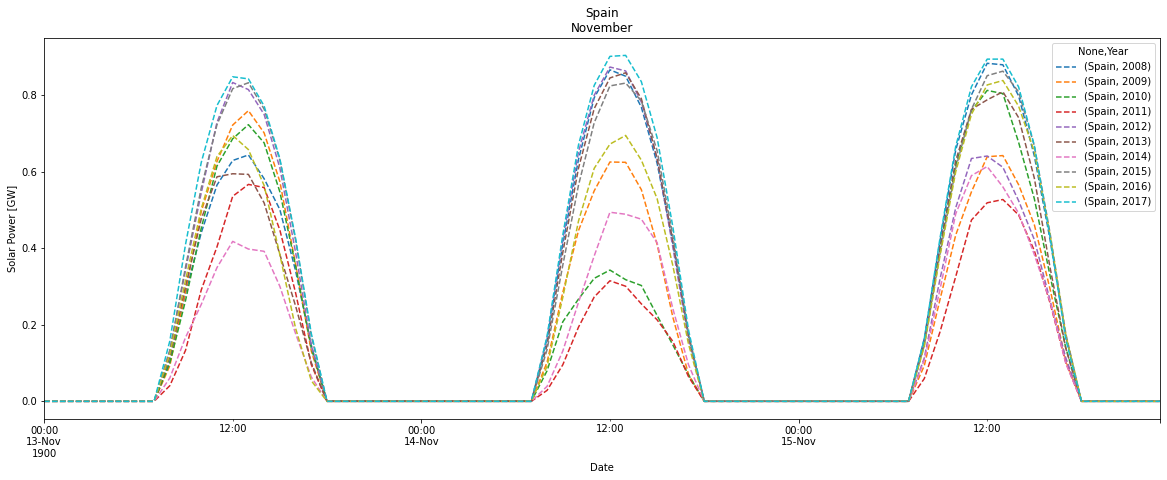

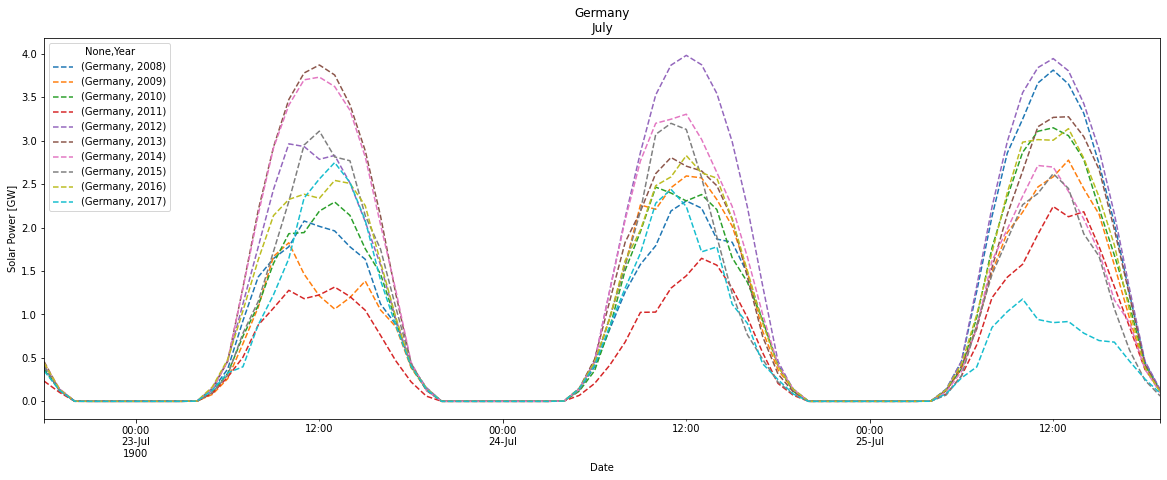

In [5]:
for pais in paises:
    tres_random(df,pais)

Obtención de estadísticas descriptivas de producción total en los diez años

In [6]:
df = leer()

In [7]:
def descriptivas(df,pais):
    pais_1 = df[pais]
    total = {}
    for year in years:
        total[str(year)] = pais_1.loc[str(year)].sum()
    sumas = pd.DataFrame.from_dict(total,orient='index')
    titulo  = 'GW totales ' + pais
    sumas.rename(columns={0:titulo},inplace=True)
    return(sumas)

In [8]:
spa = descriptivas(df,'Spain')
spa

,GW totales Spain
2008,2129.313378
2009,2178.403225
2010,2067.232506
2011,2177.438478
2012,2224.631680
2013,2132.083139
2014,2110.270166
2015,2197.684000
2016,2119.607672
2017,2252.499903


In [9]:
spa.describe()

,GW totales Spain
count,10.000000
mean,2158.916415
std,56.975659
min,2067.232506
25%,2122.034099
50%,2154.760809
75%,2192.863806
max,2252.499903


In [10]:
ger = descriptivas(df,'Germany')
ger

,GW totales Germany
2008,5862.433986
2009,5957.638373
2010,5756.005296
2011,5941.301371
2012,5768.614933
2013,5753.896022
2014,6003.212488
2015,5914.994516
2016,5946.743350
2017,5723.893671


In [11]:
ger.describe()

,GW totales Germany
count,10.000000
mean,5862.873401
std,103.319495
min,5723.893671
25%,5759.157705
50%,5888.714251
75%,5945.382855
max,6003.212488


Producción promedio, máx, min y med de un día en cada mes

In [12]:
def Por_mes(Pais,Mes):
    df = leer()
    df['Month']=df.index.month
    df['Time']=df.index.time
    Country = df[[Pais,'Month','Time']]
    mes = Country.loc[Country['Month']== Mes]
    aux = mes.groupby('Time')
    hora =aux[Pais].agg([np.mean,np.min,np.max,np.median])
    import calendar
    titulo = Pais+"\n"+str(calendar.month_name[Mes])
    hora.plot(title = titulo,figsize=(15,7),ylabel='Solar Power [GW]', ls='--')
    plt.show()
    plt.close()

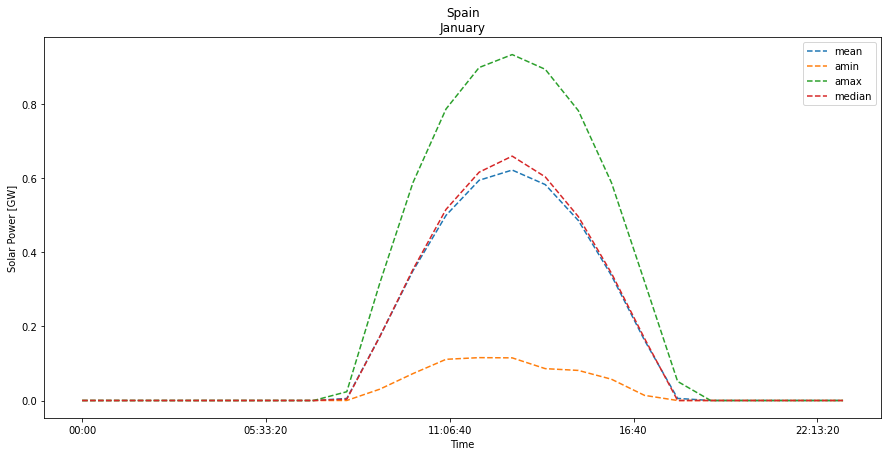

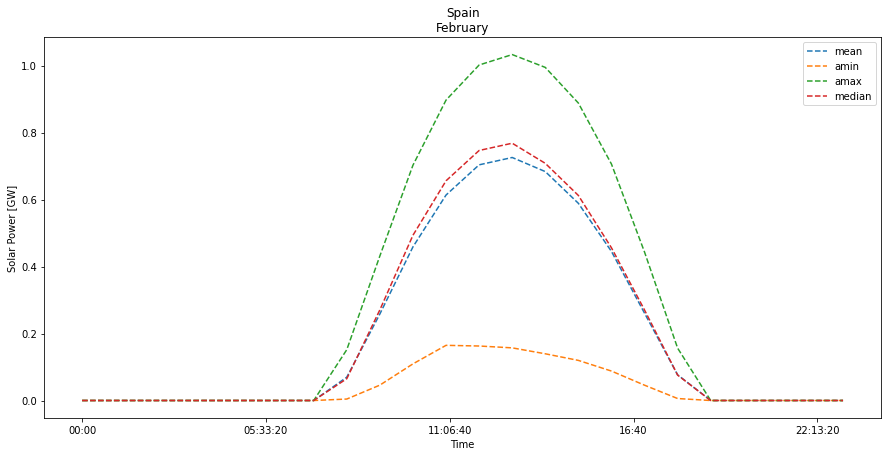

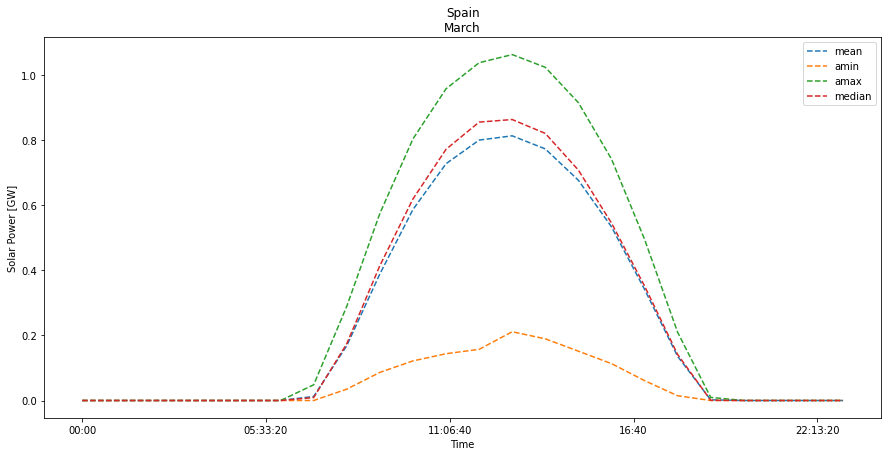

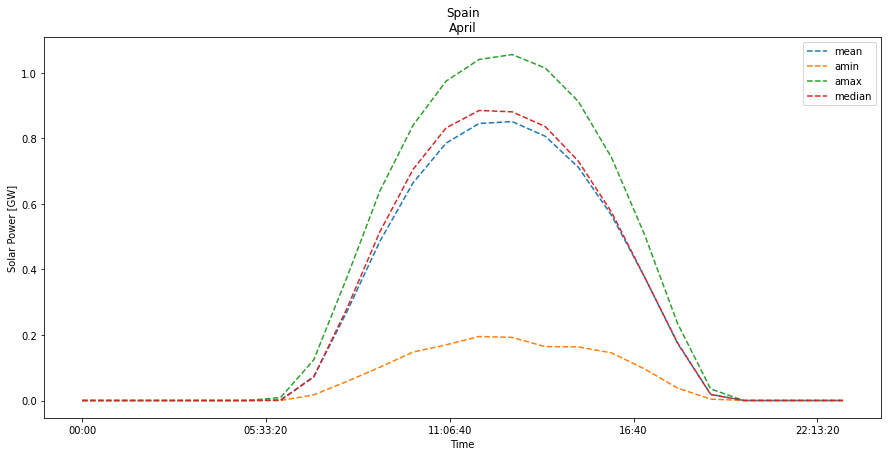

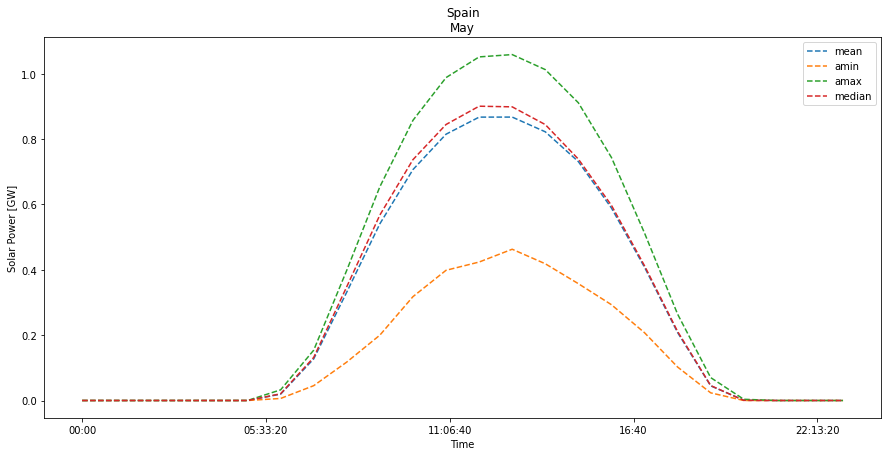

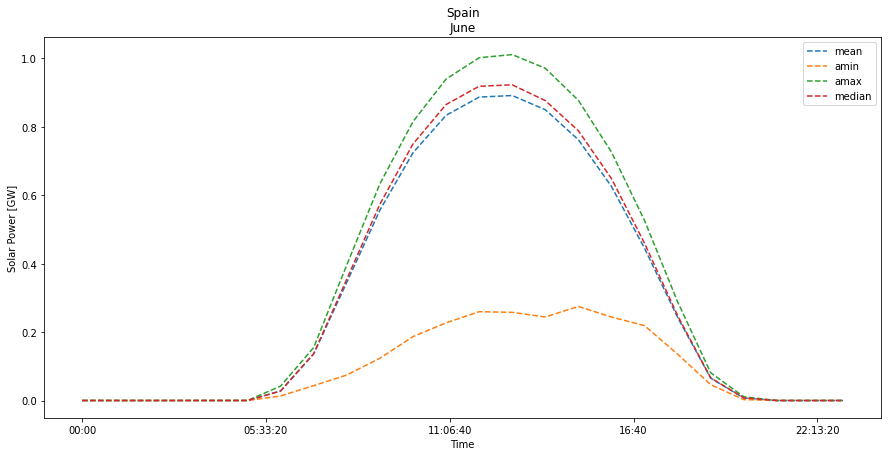

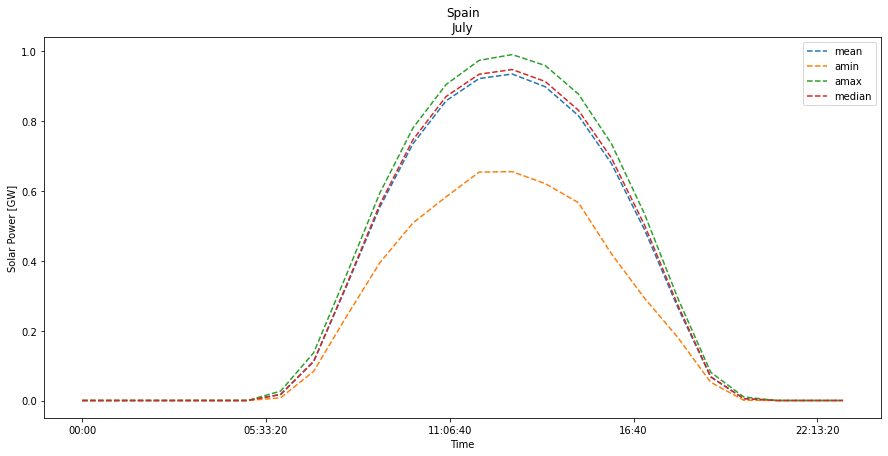

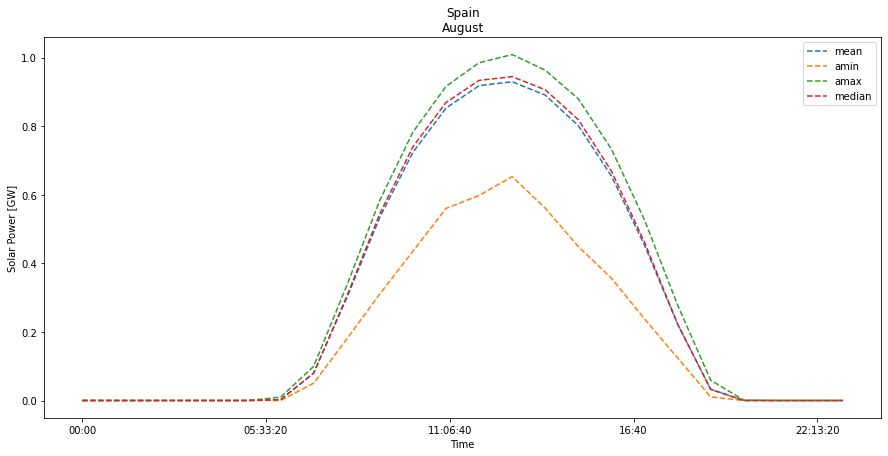

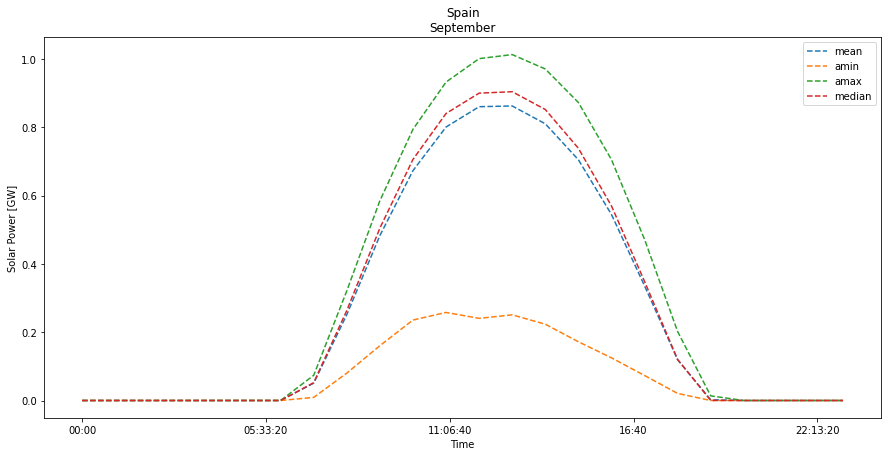

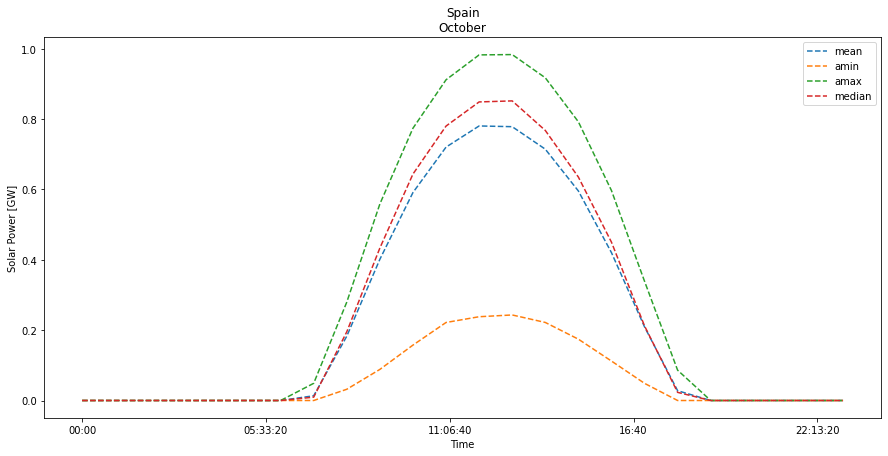

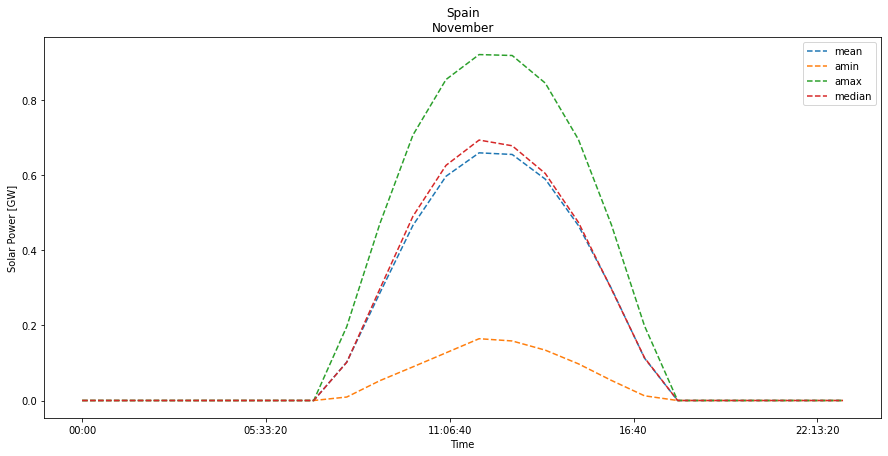

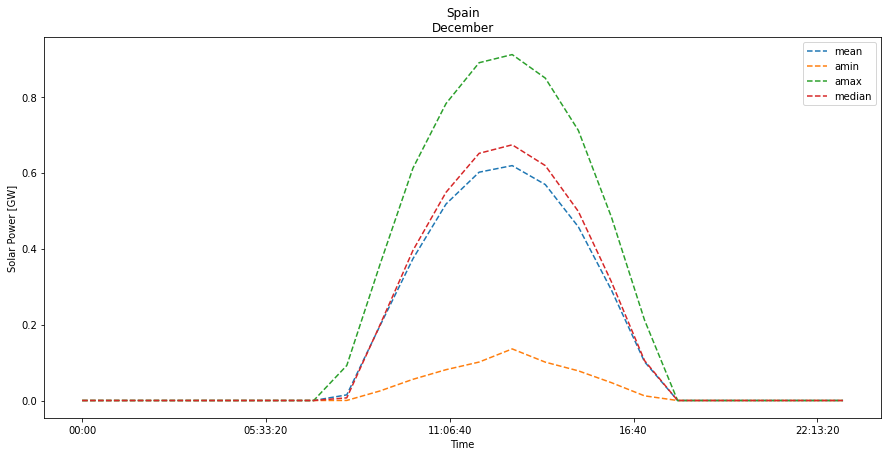

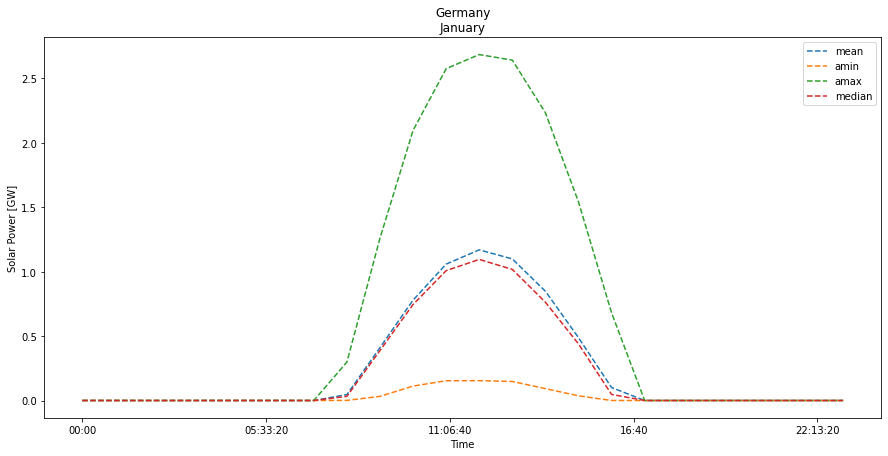

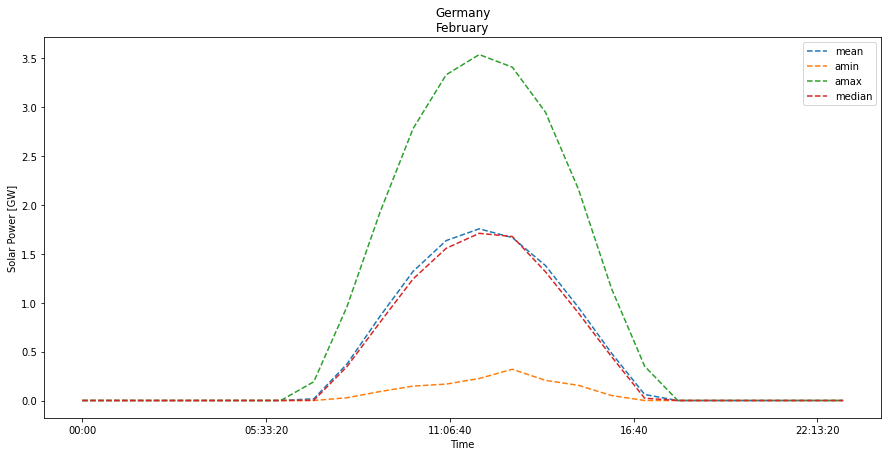

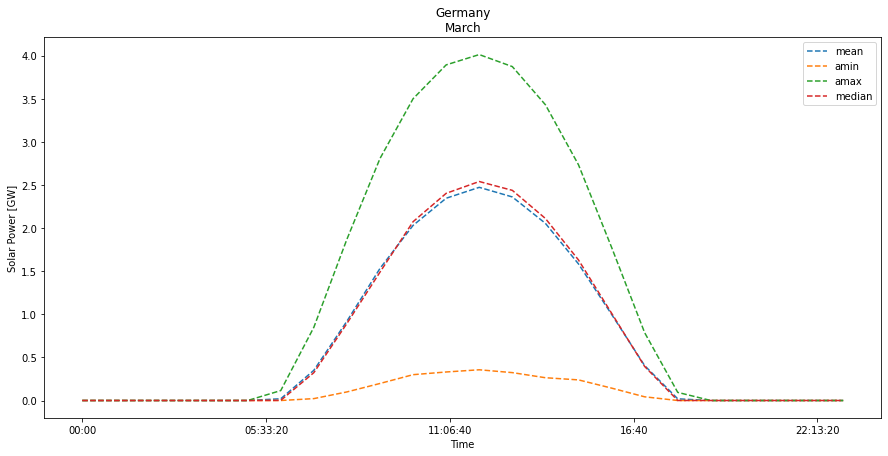

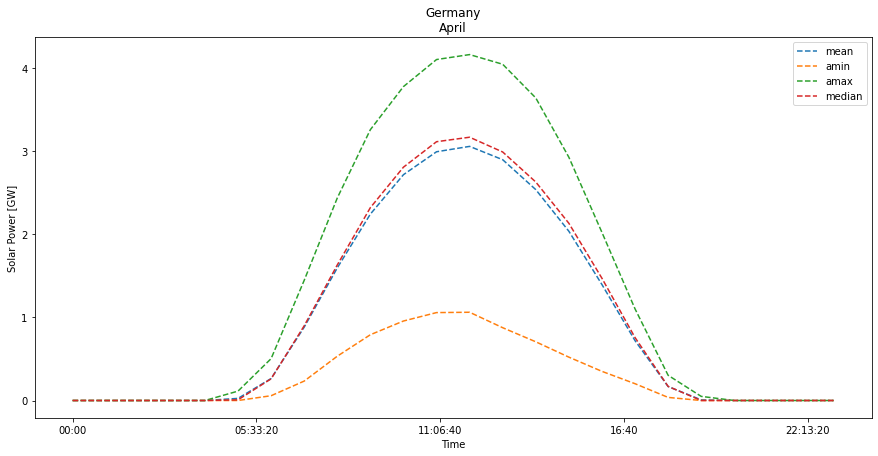

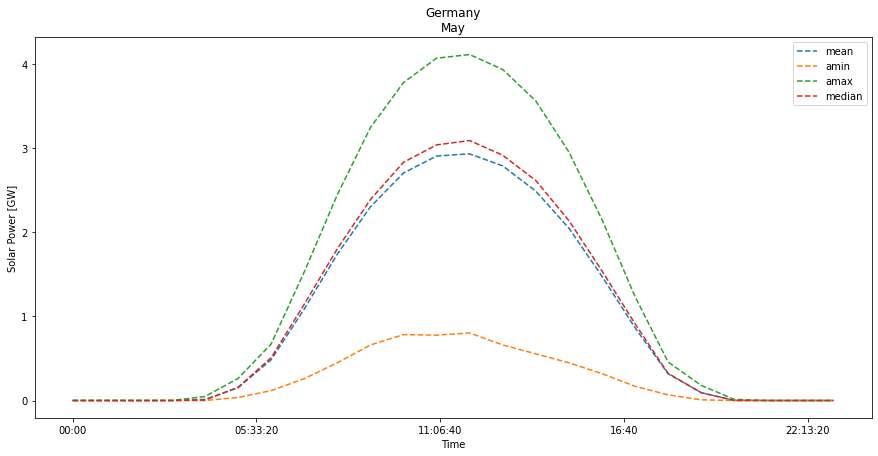

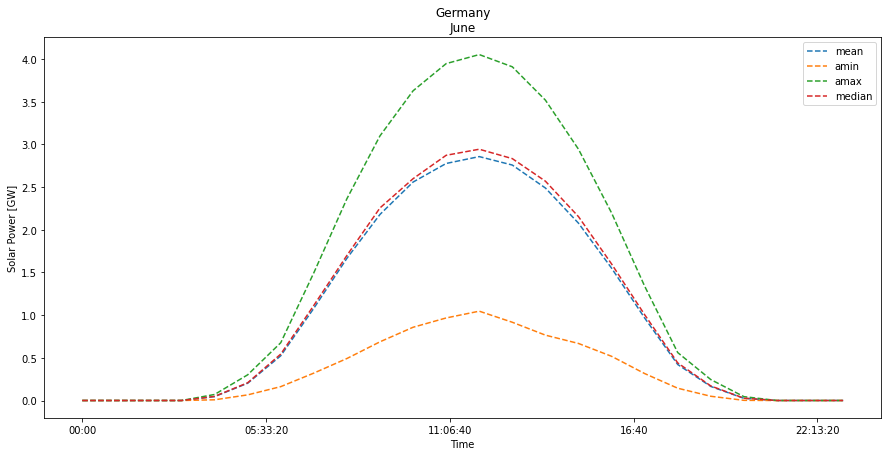

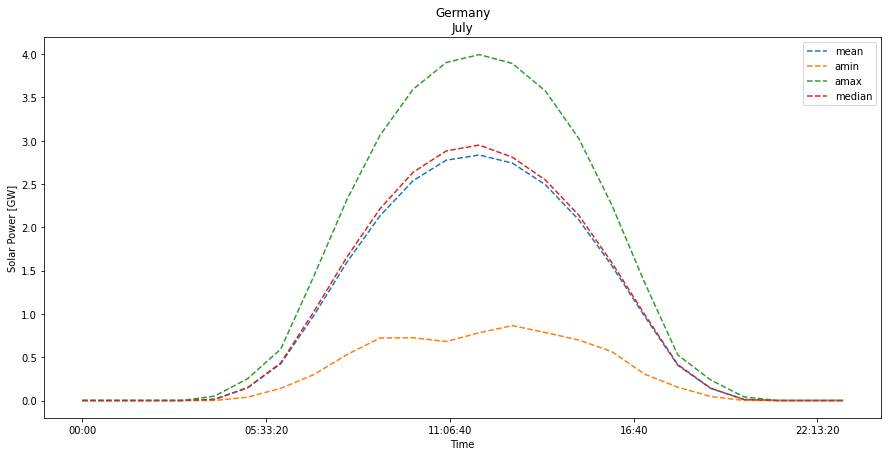

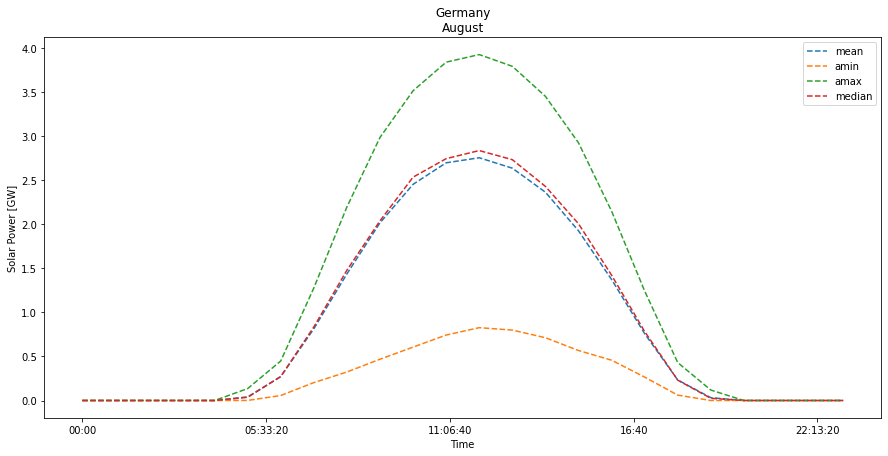

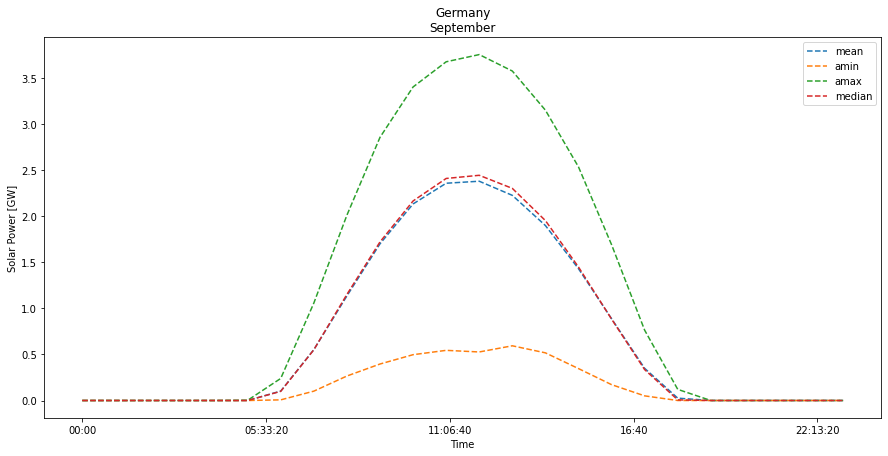

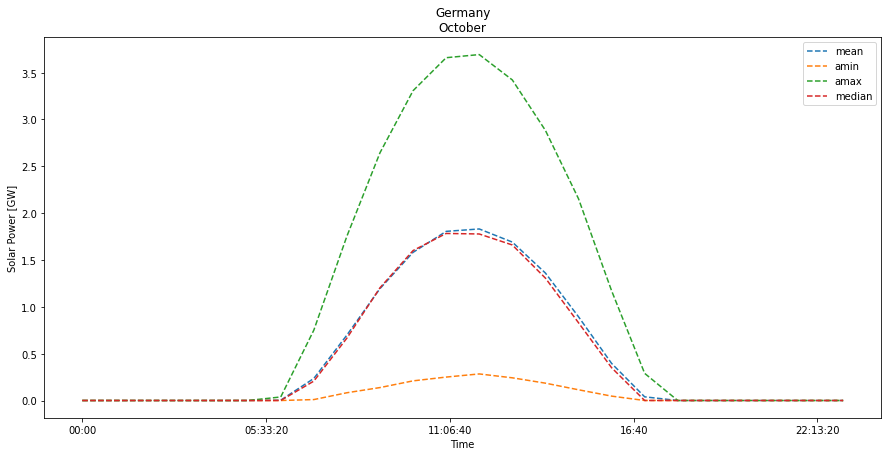

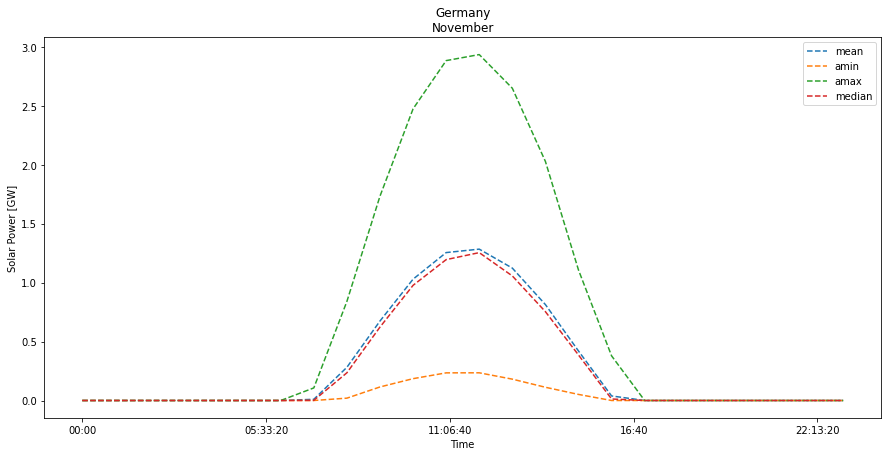

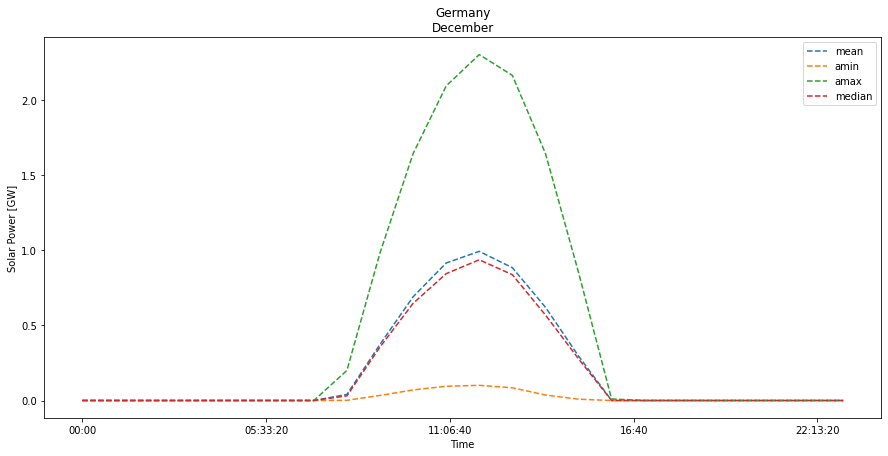

In [13]:
for pais in paises:
    for month in list(df.index.month.unique()):
        Por_mes(pais,month)

Área elegible:
Llamar la función eligible_area con argumento 'Spain' o 'Germany' y segundo argumento él uso de suelo a contemplar en el mapa

Uso de suelo disponible:
water
(34,35,39,40)


Para modificar esto se deben cambiar los inputs en scripts.py

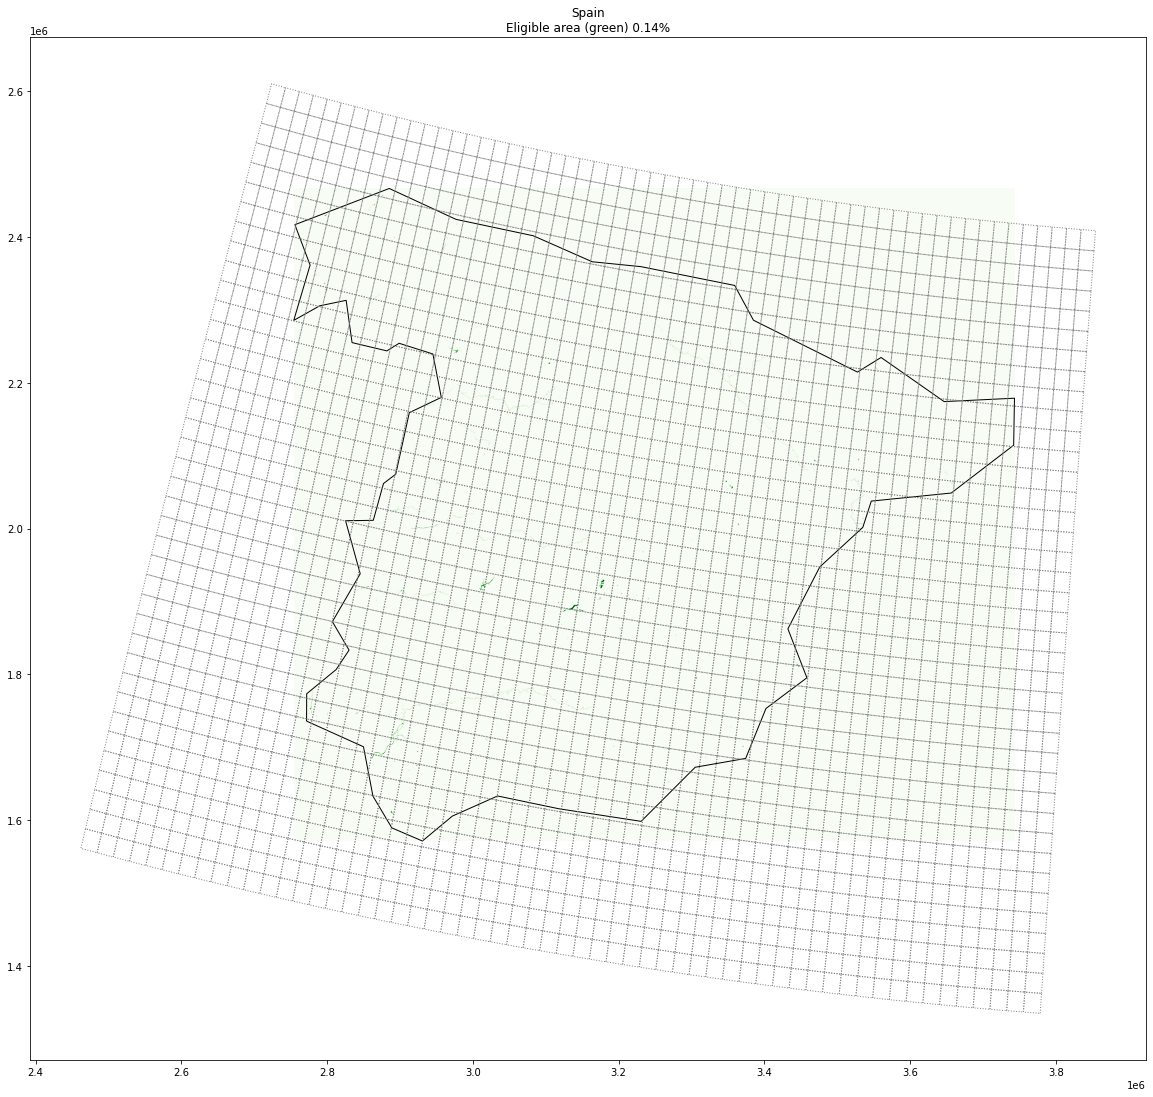

In [14]:
eligible_area('Spain',water)

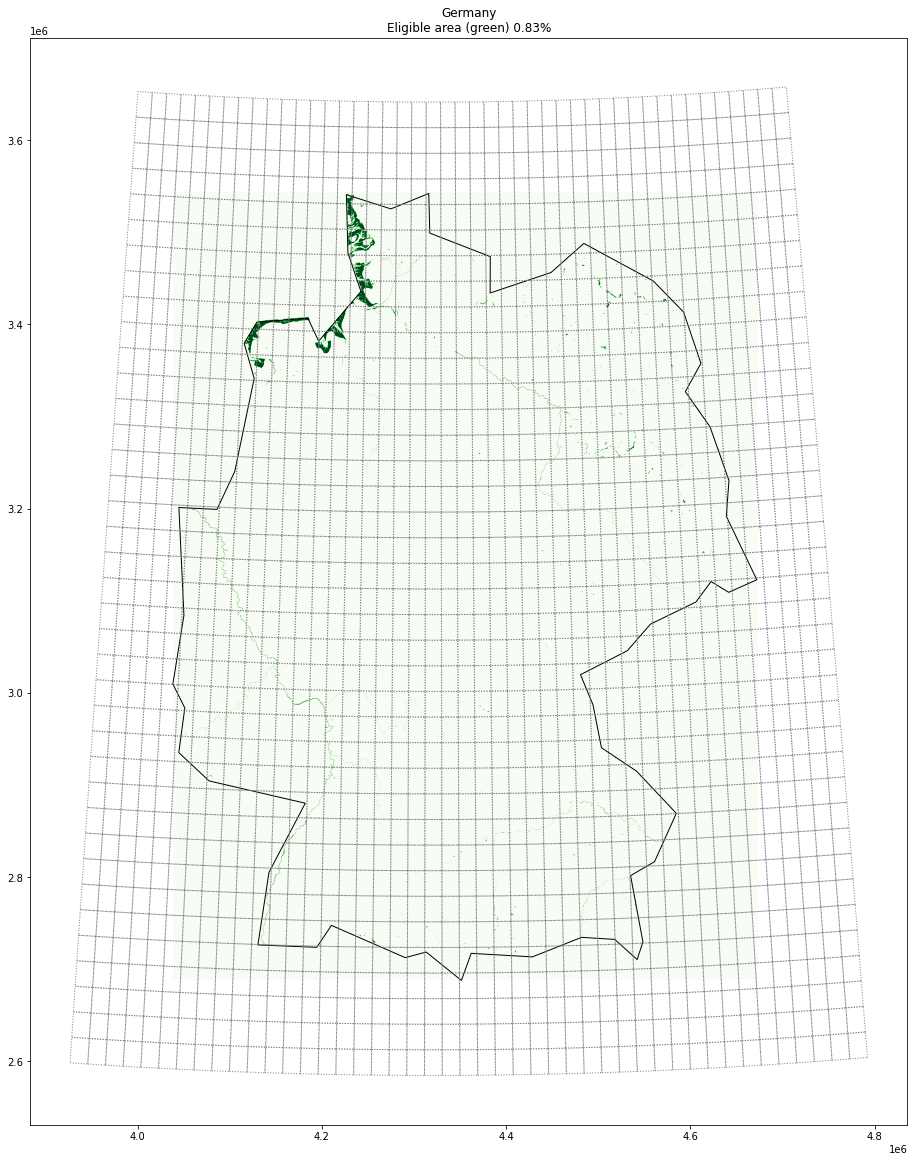

In [15]:
eligible_area('Germany',water)